In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/kpmg-data/KPMG_VI_New_raw_data_update_final.xlsx


In [2]:
import seaborn as sns
import matplotlib.pyplot as plt

# Import the datasets

In [3]:
customerAddress = pd.read_excel('../input/kpmg-data/KPMG_VI_New_raw_data_update_final.xlsx', sheet_name = 'CustomerAddress', skiprows = [0])

In [4]:
customerDemographic = pd.read_excel('../input/kpmg-data/KPMG_VI_New_raw_data_update_final.xlsx', sheet_name = 'CustomerDemographic', skiprows = [0])

In [5]:
newCustomerList = pd.read_excel('../input/kpmg-data/KPMG_VI_New_raw_data_update_final.xlsx', sheet_name = 'NewCustomerList', skiprows = [0])

In [6]:
transactions = pd.read_excel('../input/kpmg-data/KPMG_VI_New_raw_data_update_final.xlsx', sheet_name = 'Transactions', skiprows = [0])

Because the table newCustomerList shares common columns with the tables customerDemographic and customer customerAddress i will concatenate newCustomerList with the 2 tables in order to simplify the data cleaning process.

# Data Quality

I will find the maximum customer_id, in order to assign an unique id for every new customer. 4003 is the maximum id. All the new clints will have ids greater than 4003.

In [7]:
customerAddress.customer_id.max()

4003

In [8]:
newCustomerList['customer_id'] = 4004 + newCustomerList.index

### Concatenate newCustomerList and customerAddress

In [9]:
newCustomerAddress = newCustomerList[['customer_id','address', 'postcode', 'state', 'country', 'property_valuation']]
newCustomerAddress

,customer_id,address,postcode,state,country,property_valuation
0,4004,45 Shopko Center,4500,QLD,Australia,6
1,4005,14 Mccormick Park,2113,NSW,Australia,11
2,4006,5 Colorado Crossing,3505,VIC,Australia,5
3,4007,207 Annamark Plaza,4814,QLD,Australia,1
4,4008,115 Montana Place,2093,NSW,Australia,9
...,...,...,...,...,...,...
995,4999,2 Sloan Way,2200,NSW,Australia,7
996,5000,04 Union Crossing,2196,NSW,Australia,10
997,5001,33475 Fair Oaks Junction,4702,QLD,Australia,2
998,5002,57666 Victoria Way,4215,QLD,Australia,2


In [10]:
print('Shape of customerAddress before concat :', customerAddress.shape)
customerAddress = pd.concat([customerAddress, newCustomerAddress], axis=0)
print('Shape of customerAddress after concat :', customerAddress.shape)

Shape of customerAddress before concat : (3999, 6)
Shape of customerAddress after concat : (4999, 6)


## Concatenate newCustomerList and customerDemographic

In [11]:
newCustomerList.columns

Index(['first_name', 'last_name', 'gender',
       'past_3_years_bike_related_purchases', 'DOB', 'job_title',
       'job_industry_category', 'wealth_segment', 'deceased_indicator',
       'owns_car', 'tenure', 'address', 'postcode', 'state', 'country',
       'property_valuation', 'Unnamed: 16', 'Unnamed: 17', 'Unnamed: 18',
       'Unnamed: 19', 'Unnamed: 20', 'Rank', 'Value', 'customer_id'],
      dtype='object')

In [12]:
newCustomerDemographic = newCustomerList[['customer_id','first_name', 'last_name', 'gender',
       'past_3_years_bike_related_purchases', 'DOB', 'job_title',
       'job_industry_category', 'wealth_segment', 'deceased_indicator', 'owns_car', 'tenure']]
newCustomerDemographic

,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure
0,4004,Chickie,Brister,Male,86,1957-07-12,General Manager,Manufacturing,Mass Customer,N,Yes,14
1,4005,Morly,Genery,Male,69,1970-03-22,Structural Engineer,Property,Mass Customer,N,No,16
2,4006,Ardelis,Forrester,Female,10,1974-08-28,Senior Cost Accountant,Financial Services,Affluent Customer,N,No,10
3,4007,Lucine,Stutt,Female,64,1979-01-28,Account Representative III,Manufacturing,Affluent Customer,N,Yes,5
4,4008,Melinda,Hadlee,Female,34,1965-09-21,Financial Analyst,Financial Services,Affluent Customer,N,No,19
...,...,...,...,...,...,...,...,...,...,...,...,...
995,4999,Ferdinand,Romanetti,Male,60,1959-10-07,Paralegal,Financial Services,Affluent Customer,N,No,9
996,5000,Burk,Wortley,Male,22,2001-10-17,Senior Sales Associate,Health,Mass Customer,N,No,6
997,5001,Melloney,Temby,Female,17,1954-10-05,Budget/Accounting Analyst IV,Financial Services,Affluent Customer,N,Yes,15
998,5002,Dickie,Cubbini,Male,30,1952-12-17,Financial Advisor,Financial Services,Mass Customer,N,Yes,19


In [13]:
print('Shape of customerDemographic before concat :', customerDemographic.shape)
customerDemographic = pd.concat([customerDemographic, newCustomerDemographic], axis=0)
print('Shape of customerDemographic after concat :', customerDemographic.shape)

Shape of customerDemographic before concat : (4000, 13)
Shape of customerDemographic after concat : (5000, 13)


## Customer Addresses

### Check data formats
Data formats are correct.

In [14]:
customerAddress.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4999 entries, 0 to 999
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   customer_id         4999 non-null   int64 
 1   address             4999 non-null   object
 2   postcode            4999 non-null   int64 
 3   state               4999 non-null   object
 4   country             4999 non-null   object
 5   property_valuation  4999 non-null   int64 
dtypes: int64(3), object(3)
memory usage: 273.4+ KB


### Check missing values
There are no missing values in this table.

In [15]:
customerAddress.isnull().sum()

customer_id           0
address               0
postcode              0
state                 0
country               0
property_valuation    0
dtype: int64

### Check outliers
There are no outliers in this table.

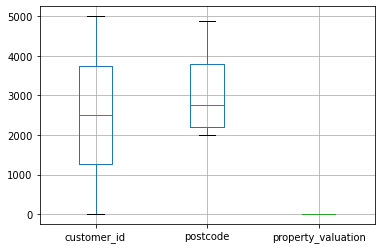

In [16]:
customerAddress.boxplot()

## Customer Demographics

### Check missing values

Here are a lot of null values, I'll have to do a missing value treatment.

In [17]:
customerDemographic.isnull().sum()

customer_id                               0
first_name                                0
last_name                               154
gender                                    0
past_3_years_bike_related_purchases       0
DOB                                     104
job_title                               612
job_industry_category                   821
wealth_segment                            0
deceased_indicator                        0
default                                1302
owns_car                                  0
tenure                                   87
dtype: int64

In [18]:
customerDemographic = customerDemographic.drop(labels = ['default'],axis = 1)

### Check data formats

I will use only one format for gender: F, M or U. I will change the format of data from string to category.

In [19]:
customerDemographic.gender.value_counts()

Female    2550
Male      2342
U          105
Femal        1
F            1
M            1
Name: gender, dtype: int64

In [20]:
customerDemographic.gender = customerDemographic.gender.replace(to_replace=['Female', 'Femal', 'F'], value= 'F')
customerDemographic.gender = customerDemographic.gender.replace(to_replace=['Male'], value= 'M')
customerDemographic.gender = customerDemographic.gender.astype('category')

I will change the format of variables : deceased_indicator and owns_car from object to bool.

In [21]:
customerDemographic.deceased_indicator = customerDemographic.deceased_indicator.replace(to_replace=['N'], value= 0)
customerDemographic.deceased_indicator = customerDemographic.deceased_indicator.replace(to_replace=['Y'], value= 1)

customerDemographic.deceased_indicator = customerDemographic.deceased_indicator.astype('bool')

In [22]:
customerDemographic.owns_car = customerDemographic.owns_car.replace(to_replace=['No'], value= 0)
customerDemographic.owns_car = customerDemographic.owns_car.replace(to_replace=['Yes'], value= 1)

customerDemographic.owns_car = customerDemographic.owns_car.astype('bool')

I will rename column name DOB to birth_date

In [23]:
customerDemographic = customerDemographic.rename(columns={"DOB": "birth_date"})

Client with id 34 appears to be born in 1843, I will replace this value with Nan.

In [24]:
customerDemographic.birth_date.min()

Timestamp('1843-12-21 00:00:00')

In [25]:
customerDemographic.loc[  customerDemographic.birth_date == customerDemographic.birth_date.min(), 'birth_date' ] = np.nan

In [26]:
customerDemographic.loc[  customerDemographic.birth_date == customerDemographic.birth_date.min()]

,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,birth_date,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure
719,720,Darrel,Canet,M,67,1931-10-23,Recruiting Manager,Retail,Affluent Customer,False,False,6.0


In [27]:
customerDemographic.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   customer_id                          5000 non-null   int64         
 1   first_name                           5000 non-null   object        
 2   last_name                            4846 non-null   object        
 3   gender                               5000 non-null   category      
 4   past_3_years_bike_related_purchases  5000 non-null   int64         
 5   birth_date                           4895 non-null   datetime64[ns]
 6   job_title                            4388 non-null   object        
 7   job_industry_category                4179 non-null   object        
 8   wealth_segment                       5000 non-null   object        
 9   deceased_indicator                   5000 non-null   bool          
 10  owns_car     

### Check outliers

In customerDemographic don't exist outliers. Deceased_indicator is a bool variable.

In [28]:
print( customerDemographic.skew() )

customer_id                             0.001198
past_3_years_bike_related_purchases     0.023792
deceased_indicator                     49.984992
owns_car                               -0.013604
tenure                                  0.051070
dtype: float64


## Transactions

### Check data format

In [29]:
transactions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   transaction_id           20000 non-null  int64         
 1   product_id               20000 non-null  int64         
 2   customer_id              20000 non-null  int64         
 3   transaction_date         20000 non-null  datetime64[ns]
 4   online_order             19640 non-null  float64       
 5   order_status             20000 non-null  object        
 6   brand                    19803 non-null  object        
 7   product_line             19803 non-null  object        
 8   product_class            19803 non-null  object        
 9   product_size             19803 non-null  object        
 10  list_price               20000 non-null  float64       
 11  standard_cost            19803 non-null  float64       
 12  product_first_sold_date  19803 n

I will change the date of product_first_sold_date from float to date.

In [30]:
transactions.product_first_sold_date = pd.to_datetime('1899-12-30') + pd.to_timedelta(transactions.product_first_sold_date,'D')

I will change the type of variable online_order from object to bool.

In [31]:
transactions.online_order = transactions.online_order.replace(to_replace=['No'], value= 0)
transactions.online_order = transactions.online_order.replace(to_replace=['Yes'], value= 1)

transactions.online_order = transactions.online_order.astype('bool')

In [32]:
transactions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   transaction_id           20000 non-null  int64         
 1   product_id               20000 non-null  int64         
 2   customer_id              20000 non-null  int64         
 3   transaction_date         20000 non-null  datetime64[ns]
 4   online_order             20000 non-null  bool          
 5   order_status             20000 non-null  object        
 6   brand                    19803 non-null  object        
 7   product_line             19803 non-null  object        
 8   product_class            19803 non-null  object        
 9   product_size             19803 non-null  object        
 10  list_price               20000 non-null  float64       
 11  standard_cost            19803 non-null  float64       
 12  product_first_sold_date  19803 n

### Check missing values


In [33]:
transactions.isnull().sum()

transaction_id               0
product_id                   0
customer_id                  0
transaction_date             0
online_order                 0
order_status                 0
brand                      197
product_line               197
product_class              197
product_size               197
list_price                   0
standard_cost              197
product_first_sold_date    197
dtype: int64

In [34]:
transactions.shape

(20000, 13)

Only 1% from the record from transactions include missing values so I will remove this records. 

In [35]:
197 / 20000 * 100

0.985

In [36]:
transactions = transactions.dropna( how = 'any')

### Check outliers

Value of the skewness for the variable called standard_cost is 0.86, this indicates a that the variable is positively skewed. The other variables don't have outliers.

In [37]:
print(transactions.skew())

transaction_id    0.001180
product_id        0.072353
customer_id       0.011879
online_order     -0.039500
list_price       -0.126527
standard_cost     0.864142
dtype: float64


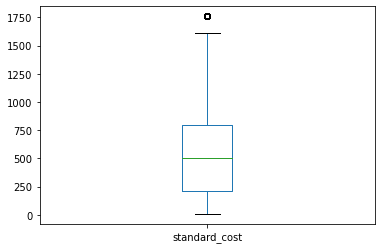

In [38]:
transactions.standard_cost.plot.box()

The boxplot indicates that sandard_cost has an outlier, a value equal with 1977.36. After assessment, I found this value in 195 of records, so I won't remove it.

In [39]:
transactions.loc[transactions.standard_cost == transactions.standard_cost.max(), ].shape

(195, 13)

## Merge customerDemographic an customerAddress

In [40]:
customers = customerDemographic.merge( customerAddress, on = 'customer_id')

In [41]:
transactions

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date
0,1,2,2950,2017-02-25,False,Approved,Solex,Standard,medium,medium,71.49,53.62,2012-12-02
1,2,3,3120,2017-05-21,True,Approved,Trek Bicycles,Standard,medium,large,2091.47,388.92,2014-03-03
2,3,37,402,2017-10-16,False,Approved,OHM Cycles,Standard,low,medium,1793.43,248.82,1999-07-20
3,4,88,3135,2017-08-31,False,Approved,Norco Bicycles,Standard,medium,medium,1198.46,381.10,1998-12-16
4,5,78,787,2017-10-01,True,Approved,Giant Bicycles,Standard,medium,large,1765.30,709.48,2015-08-10
...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,19996,51,1018,2017-06-24,True,Approved,OHM Cycles,Standard,high,medium,2005.66,1203.40,2003-07-21
19996,19997,41,127,2017-11-09,True,Approved,Solex,Road,medium,medium,416.98,312.74,1997-05-10
19997,19998,87,2284,2017-04-14,True,Approved,OHM Cycles,Standard,medium,medium,1636.90,44.71,2010-08-20
19998,19999,6,2764,2017-07-03,False,Approved,OHM Cycles,Standard,high,medium,227.88,136.73,2004-08-17
